In [171]:
# !pip install -q -U google-generativeai
# !pip install ipywidgets

In [159]:
import pathlib
import textwrap
import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('*', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [173]:
import os
os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

## Function to load OpenAI model and get respones
model = genai.GenerativeModel('models/gemini-2.0-flash') 
chat = model.start_chat(history=[])
def get_gemini_response(question):
    
    response =chat.send_message(question,stream=True)
    return response

In [161]:
import streamlit as st

In [170]:
response=model.generate_content('What is schrodingers cat experiment??')
to_markdown(response.text) ##to_markdown for more aesthetic way to print 

> Schrödinger's cat is a famous thought experiment designed to illustrate the paradoxes and counter-intuitive nature of quantum mechanics when applied to everyday objects. It highlights the problems of superposition and observation in quantum theory. Here's a breakdown:
> 
>   *  *The Setup:  *  *
> 
> Imagine a sealed box containing:
> 
>   *     *  *A cat:  *  *  A living, breathing cat.
>   *     *  *A radioactive atom:  *  *  A radioactive atom has a 50% chance of decaying within one hour.
>   *     *  *A Geiger counter:  *  * This detects radioactive decay.
>   *     *  *A hammer:  *  *  Connected to the Geiger counter.
>   *     *  *A vial of poison:  *  *  Also connected to the hammer.
> 
>   *  *The Process:  *  *
> 
> 1.    *  *Radioactive Decay:  *  * If the radioactive atom decays, the Geiger counter detects it.
> 2.    *  *Hammer Action:  *  *  The Geiger counter triggers the hammer.
> 3.    *  *Poison Release:  *  * The hammer smashes the vial of poison.
> 4.    *  *Cat's Fate:  *  * The poison kills the cat.
> 
>   *  *The Quantum Paradox:  *  *
> 
>   *     *  *Superposition:  *  *  According to quantum mechanics, before we open the box, the radioactive atom is in a state of   *  *superposition.  *  * This means it's simultaneously both decayed AND not decayed. It's in a fuzzy state of probability.
>   *     *  *Cat in Superposition?  *  *  Because the cat's fate is directly linked to the atom's state, Schrödinger argued that the cat must also be in a superposition.  Before we open the box, the cat is both   *  *alive AND dead  *  * at the same time.
>   *     *  *Observation/Measurement:  *  * The critical point is that it's only when we   *  *open the box and observe  *  * the system that the superposition collapses.  The act of observing forces the atom (and therefore the cat) to "choose" a definite state: either decayed (cat dead) or not decayed (cat alive).
> 
>   *  *The Point of the Experiment:  *  *
> 
> Schrödinger wasn't suggesting that cats can actually be in this state. The experiment's purpose was to:
> 
>   *     *  *Highlight the Absurdity:  *  * Show the seemingly absurd consequences of applying quantum mechanics to macroscopic objects. It questioned how a microscopic quantum effect (radioactive decay) could have such a drastic and paradoxical impact on a macroscopic object (the cat).
>   *     *  *Critique the Copenhagen Interpretation:  *  *  Schrödinger was skeptical of the Copenhagen interpretation of quantum mechanics, which states that a quantum system only exists in a definite state after it is measured. He argued that this interpretation implies that the act of observation somehow creates reality.
>   *     *  *Raise Questions about Quantum Measurement:  *  *  The experiment raises fundamental questions about the nature of measurement in quantum mechanics. What constitutes a measurement?  What is the role of the observer? When does the superposition collapse?
> 
>   *  *Key Takeaways:  *  *
> 
>   *     *  *Superposition:  *  *  Quantum systems can exist in multiple states simultaneously until observed.
>   *     *  *Measurement Problem:  *  *  The act of measurement appears to collapse the superposition and force the system into a definite state.
>   *     *  *Macro vs. Micro:  *  * The experiment highlights the difficulty in reconciling quantum mechanics (which describes the very small) with our classical understanding of the macroscopic world.
> 
>   *  *In simpler terms, imagine flipping a coin, but you can't look at it. Before you look, the coin is both heads AND tails at the same time. It's only when you look that it "chooses" to be either heads or tails. Schrödinger's cat is like that coin, but much more disturbing.  *  *


Image 'cats.jpeg' loaded successfully.


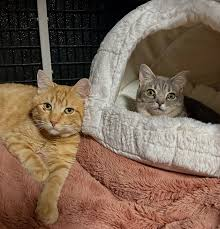

The main subject of the image is two cats. One cat is orange and tabby, lying on the edge of a pink blanket. The other cat is grey and appears to be sitting inside a fluffy, white cat bed.



In [172]:
from dotenv import load_dotenv
import PIL.Image
from PIL import Image

#Load Google API key from a .env file
load_dotenv()
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

IMAGE_PATH = r'C:\Users\hp\Desktop\LLM_st_app\cats.jpeg' #Use 'r' for raw string to handle backslashes
PROMPT = "What is the main subject of this image?"

try:
    # 1. Load the image
    img = PIL.Image.open(IMAGE_PATH)
    print(f"Image '{os.path.basename(IMAGE_PATH)}' loaded successfully.")
    response = model.generate_content([PROMPT, img])
    display(img)  ##using display instead of print to see the image 
    print(response.text)
    

except FileNotFoundError:
    print(f"Error: Image not found at '{IMAGE_PATH}'. Please check the path and filename.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Please ensure your GOOGLE_API_KEY is correct and you have an internet connection.")